# Анализ игр для интернет-магазина «Стримчик»

Цель интернет-магазина «Стримчик» — определить, какие продукты могут стать популярными для продажи, чтобы спланировать рекламные кампании на 2017 год.

**Для этого перед нами стоят следующие задачи:**
- Изучить информацию о продажах игр, оценках пользователей и экспертов, жанрах и платформах из открытых источников.
- Выявить закономерности, которые определяют успешность продуктов.
- Проверить гипотезы о том, как пользовательские оценки влияют на продажи.
- Сформулировать рекомендации по итогам работы.

**План работы:**
- Загрузить данные из полученного файла.
- Обработать проблемные участки датафрейма и подготовить данные для анализа.
- Изучить общую информацию об играх.
- Рассмотреть наиболее актуальный период, обратив внимание на:
    - динамику продаж в это время;
    - продажи на разных платформах;
    - влияние оценок экспертов и игроков на продажи;
    - продажи игр в разных жанрах;
    - особенности продаж в регионах.
- Проверить гипотезы о различиях средних пользовательских оценок на игры на разных платформах и в разных жанрах.
- Сформулировать выводы и выделить самые потенциально прибыльные направления.

**Описание данных:**
- `name` — название игры
- `platform` — платформа
- `year_of_release` — год выпуска
- `genre` — жанр игры
- `na_sales` — продажи в Северной Америке (миллионы проданных копий)
- `eu_sales` — продажи в Европе (миллионы проданных копий)
- `jp_sales` — продажи в Японии (миллионы проданных копий)
- `other_sales` — продажи в других странах (миллионы проданных копий)
- `critic_score` — оценка критиков (максимум 100)
- `user_score` — оценка пользователей (максимум 10)
- `rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board)

##  Чтение данных

In [1]:
#импортируем библиотеки для работы
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
!pip install phik 
import phik
from phik.report import plot_correlation_matrix
from scipy import stats as st

#устанавливаем единый стиль для графиков
custom_palette=['#cfeb9c','#aedea2','#8ed1a5','#70c5a6','#56afac','#3e94b7','#486caf',
                '#5d50a3','#7c2b76','#9b0547','#b71e47','#d7414e','#e55649','#f36b44','#f88b51',
                '#fcac61','#fdc473','#feda85','#feea9e','#f6fbb0','#eaf69e']
sns.set_palette(custom_palette)
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')
#выводим все стоблцы в таблицах
pd.set_option('display.max_columns', None)

In [2]:
#создаём функцию для первичного изучения df
def show_info(df):
    display(df.info())
    print('-'*25)
    print('Проверка на дубликаты:', df.duplicated().sum())
    print('-'*25)
    print('Проверка на пропуски:')
    display(df.isnull().sum())
    print('-'*25)
    print('Статистика:')
    display(df.describe(include=['object']).T)
    if not df.select_dtypes(include=['int64', 'float64']).empty:
        display(df.select_dtypes(include=['int64', 'float64']).describe().T)
    display(df.head())

In [3]:
#считываем данные
df = pd.read_csv('/datasets/games.csv')
#применяем функцию
show_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

-------------------------
Проверка на дубликаты: 0
-------------------------
Проверка на пропуски:


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

-------------------------
Статистика:


,count,unique,top,freq
Name,16713,11559,Need for Speed: Most Wanted,12
Platform,16715,31,PS2,2161
Genre,16713,12,Action,3369
User_Score,10014,96,tbd,2424
Rating,9949,8,E,3990


,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


При беглом изучении выведенной информации мы можем увидеть следующее:
- Датасет состоит из 11 столбцов и 16715 строк.
- Наименования с заглавными буквами — нужно привести их к нижнему регистру.
- У нас есть данные двух типов: `float` и `object`. Что не так:
    - Оценка пользователей указана в текстовом формате, а по статистике преобладающее значение `tbd` — to be defined. Оценка не определена. Нужно изучить этот столбец и обработать, чтобы перести оценку в числовой тип.
    - Годы выпуска игр из-за пропусков имеют тип `float`. Мы можем устранить пропуски и перести данные в цельночисловой тип.
- Полных дубликатов в строках нет.
- В 6 столбцах имеются пропуски, которые нужно проверить и обработать:
    - Name — 2 пропуска
    - Year_of_Release — 269
    - Genre — 2
    - Critic_Score — 8578
    - User_Score — 6701
    - Rating — 6766
- Некоторые игры перевыпускались и продавались в нескольких регионах, например, `Need for Speed: Most Wanted` встречается в датасете 12 раз — нужно проверить данные на неполные дубликаты.
- В датасете есть игры для 31 платформы.
- Нам предстоит сравнивать 12 жанров, самой популярной из которых является `Action`.
- Из 8 рейтингов самый популярный `E` — «Для всех».
- Нам предстоит рассматривать игры, выпущенные за период 1980-2016 годы.
- Разброс оценок критиков большой: от 13 до 98.

## Предобработка данных

In [4]:
#приводим наименования столбцов к нижнему регистру
df.columns = df.columns.str.lower()
#проверяем результат
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Столцы успешно переведены в нижний регистр. Проверим пропуски в столбцах `name` и `genre`.

### Обработка пропусков и аномалий

In [5]:
#выводим строки с пропусками в name и genre
df[df[['name', 'genre']].isna().any(axis=1)].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в этих двух строках совпадают, чем их заполнять, неизвестно. У первой выведенной игры указаны неплохие продажи в Северной Америке, но одна строка погоды не сделает — удалим их обе.

In [6]:
#удаляем пропуски
df = df.dropna(subset=['name', 'genre']).reset_index(drop=True) 
#считаем долю пропусков в оставшемся датасете
df.isna().mean().sort_values(ascending=False)

critic_score       0.513133
rating             0.404715
user_score         0.400826
year_of_release    0.016095
name               0.000000
platform           0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
dtype: float64

Пропуски в названиях игр и жанре удалены, но у нас есть ещё 4 столбца с куда большей долей пропущенных значений.
- Больше всего пропусков в оценках критиков — 51,3%. Нет смысла их заменять или удалять, потому оставим пропуски как есть.
- В рейтинге игр и оценках пользователей пропусков около 40%.
    - Пропуски в рейтингах мы тоже заменить не сможем, разве что поставить заглушки вместо пропусков, чтобы при анализе строки не терялись.
    - Оценки пользователей мы не сможем заменить, но посмотрим, как можно исправить тип на числовой.
- В 1,6% случаев год не указан, это небольшая часть от всего набора данных. В дальнейшем мы будем работать только с актуальными годами, поэтому нет необходимости хранить эту небольшую часть данных без дат выпуска игр. Если удалить пустые значения, столбец можно будет преобразовать в целочисленный тип.

In [7]:
#удаляем пропуски
df = df.dropna(subset=['year_of_release']).reset_index(drop=True) 
#меняем тип данных
df['year_of_release'] = df['year_of_release'].astype('int64')
#проверяем 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


Пропуски удалены, тип данных успешно изменён.

---

Изучим проблемы в данных об оценке пользователей.

In [8]:
#выведем уникальные значения столбца user_score
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо пропусков в дробные значения затесалась строка `tbd`. По сути — тот же пропуск, так как эта аббревиатура обозначает отсутствие данных на текущий момент. Так как пропуски в оценках пользователей мы не можем заменить, то добавим к ним ещё.

In [9]:
#заменяем tbd на пропуск
df['user_score'] = df['user_score'].replace('tbd', np.nan)
#преобразовываем столбец в числовой тип
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
#проверяем
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [10]:
#считаем пропуски
df['user_score'].isna().sum()

8981

На 2280 пропусков в столбце `user_score` стало больше. Зато мы теперь сможем работать с числовым типом.

Как определились ранее, пропуски в столбцах `critic_score` и `user_score` мы заменять не будем, эти данные могли быть не собраны, если игры были не очень популярны и информации для выставления оценки оказалось недостаточно.

---

Рассмотрим поближе столбец `rating`.

In [11]:
#выведем уникальные значения столбца rating
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Помимо пропусков, у нас есть восемь рейтингов, которые означают следующее:
- `E` (Everyone) — игра подходит для всех возрастов. 
- `M` (Mature 17+) — игра предназначена для людей старше 17 лет.
- `T` (Teen) — игра подходит для подростков от 13 лет и старше.
- `E10+` (Everyone 10 and older) — игра подходит для детей от 10 лет и старше.
- `K-A` (Kids to Adults) — устаревший рейтинг, который использовался для игр, подходящих для всех возрастов. В 1997 году заменён на рейтинг E.
- `AO` (Adults Only 18+) — игра предназначена только для взрослых.
- `EC` (Early Childhood) — игра подходит для детей младшего возраста (обычно до 6 лет).
- `RP` (Rating Pending) — игра ещё не была оценена. Этот рейтинг будет заменён на конечный после завершения оценки.

Так как в столбце `rating` значения типа `object`, мы ничего не теряем, если воспользуемся заглушкой. Придумывать рейтинги за ассоциацию, специализирующуюся на этом, мы не будем. Возможно, отсутствие рейтинга связано с тем, что игра не была популярна в Америке, но продавалась в других странах, где рейтинги присваиваются другими организациями.

In [12]:
#ставим заглушку на пропуски
df['rating'] = df['rating'].fillna('unknown')
#проверям
df['rating'].isna().sum()

0

В столбце с рейтингами игр пропусков больше нет.

---

Сразу после прочтения файла мы проверяли датасет на полные дубликаты, но убедимся ещё раз, что там нет игр на одной платформе, выпущенных в один год. Всё же некоторые игры встречаются в датасете слишком часто.

In [13]:
#проверяем совпадения по трём столбцам
df[df[['name', 'platform', 'year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Ожидания на совпадения были выше :)

Вероятно, данные о продажах были получены из разных источников, и не вся информация была учтена. Это объясняет, почему в одной строке отражены потери. Исключим из датасета строку с десятью тысячами продаж.

In [14]:
#удаляем строку по индексу
df = df.drop(index=15969).reset_index(drop=True)
#проверяем совпадения ещё раз
df[df[['name', 'platform', 'year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Теперь у нас нет неявно повторяющихся строк. Мы можем перейти к завершающей стадии подготовки набора данных.

### Добавляем новый столбец

In [15]:
#суммируем продажи по каждой строке
df['sum_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
#меняем положение столбца
df.insert(8, 'sum_sales', df.pop('sum_sales'))
#проверяем
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,sum_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,unknown


Новый столбец успешно добавлен и перемещён после продаж в регионах. Так как ранее мы видели в статистике, что минимальные продажи равны нулю, посмотрим, как сейчас обстоят дела в суммах продаж.

In [16]:
#выводим статистику
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,16443.0,2006.485921,5.875546,1980.0,2003.00,2007.00,2010.00,2016.00
na_sales,16443.0,0.264028,0.818400,0.0,0.00,0.08,0.24,41.36
eu_sales,16443.0,0.145939,0.506731,0.0,0.00,0.02,0.11,28.96
jp_sales,16443.0,0.078492,0.311109,0.0,0.00,0.00,0.04,10.22
other_sales,16443.0,0.047597,0.188011,0.0,0.00,0.01,0.03,10.57
sum_sales,16443.0,0.536055,1.558828,0.0,0.06,0.17,0.47,82.54
critic_score,7982.0,68.992608,13.920049,13.0,60.00,71.00,79.00,98.00
user_score,7462.0,7.126548,1.499429,0.0,6.40,7.50,8.20,9.70


По некоторым играм совсем не было продаж, судя по минимальной сумме продаж всех копий. Нужно проверить такие строки.

In [17]:
#выведем аномальные строки
df.query('sum_sales == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,sum_sales,critic_score,user_score,rating
16404,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,0.0,NaN,NaN,unknown
16437,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,0.0,NaN,NaN,unknown


Всего две строки, совершенно неинформативные. Избавимся от них.

In [18]:
#удаляем неинформативные строки
df = df.query('sum_sales != 0').reset_index(drop=True)
#проверям
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,16441.0,2006.485737,5.875880,1980.00,2003.00,2007.00,2010.00,2016.00
na_sales,16441.0,0.264061,0.818445,0.00,0.00,0.08,0.24,41.36
eu_sales,16441.0,0.145956,0.506759,0.00,0.00,0.02,0.11,28.96
jp_sales,16441.0,0.078501,0.311127,0.00,0.00,0.00,0.04,10.22
other_sales,16441.0,0.047602,0.188021,0.00,0.00,0.01,0.03,10.57
sum_sales,16441.0,0.536121,1.558911,0.01,0.06,0.17,0.47,82.54
critic_score,7982.0,68.992608,13.920049,13.00,60.00,71.00,79.00,98.00
user_score,7462.0,7.126548,1.499429,0.00,6.40,7.50,8.20,9.70


Это уже похоже на правду: если хотя бы в одном регионе были продажи игры, то это следует принять во внимание.

___

- Мы привели наименования столбцов к нижнему регистру.
- Заменили типы в столбцах `year_of_release` и `user_score`.
- Удалили строки с пропусками в `name`, `genre` и `year_of_release`, а также избавились от неинформативных строк из нового столбца `sum_sales`, из-за чего датасет уменьшился всего на 1,64%.
- Устранили аббревиатуру `tbd` в оценках пользователей.
- Поставили заглушку `unknown` в столбце с рейтингом игр вместо пропусков.
- Остальные пропуски сохранили, так как не можем качественно их заполнить.
- Удалили строку с неявным дубликатом игры.
- Посчитали суммарные продажи во всех регионах в новом столбце.

 Можно приступать к анализу данных.

## Исследовательский анализ данных

### Общая информация

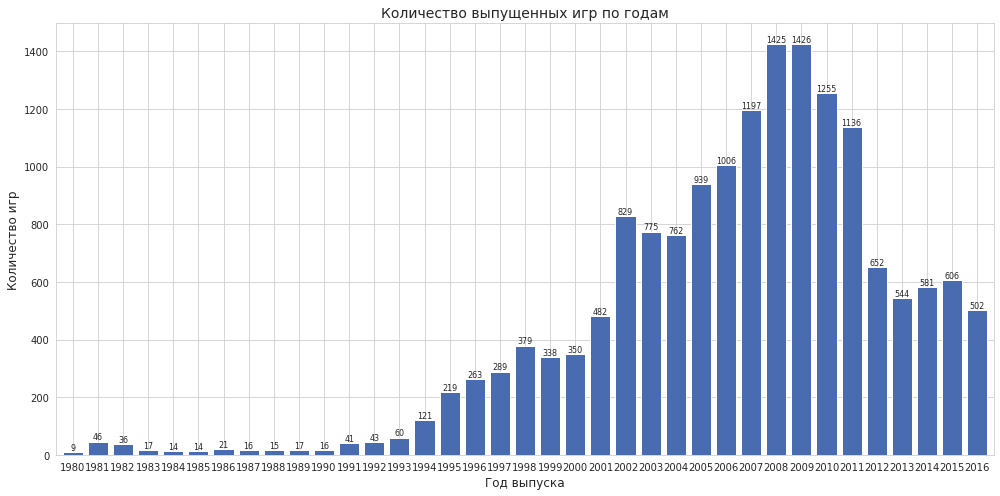

In [19]:
#построим график
plt.figure(figsize=(14, 7))
ax = (df['year_of_release'].value_counts().sort_index()).plot(kind='bar', width=0.8, color=custom_palette[6])
plt.title('Количество выпущенных игр по годам', fontsize=14)
plt.xlabel('Год выпуска', fontsize=12)
plt.ylabel('Количество игр', fontsize=12)
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

- До 1994 года выпускалось очень мало игр.
- В 2002 году мы наблюдаем значительный рост, который продолжается до 2009 года, за исключением 2003–2004, когда выпуск игр немного снизился. 
- Начиная с 2010 года количество выпускаемых игр начало уменьшаться, провалившись в 2012 до 652. Это может объяснить экономический кризис, прокатившийся по миру. 
- После 2013 года выпуски игр вплоть до 2016 так и не выправились.

---

Посмотрим, как обстояли дела на разных платформах за период от 1980 и до 2016 годов. Поскольку это не последний график подобного вида, создадим функцию.

In [20]:
#создаём функцию для построения графика распределения
def df_pivot(df,index,values,aggfunc,title,ylabel):
    #создаём сводную таблицу
    df_pivot_table = (df.pivot_table(index=index, values=values, aggfunc=aggfunc).sort_values(by=values, ascending=False))
    #строим график
    plt.figure(figsize=(14, 6))
    ax = sns.barplot(x=df_pivot_table.index, y=df_pivot_table[values], palette=custom_palette)
    plt.title(title, fontsize=14)
    plt.xlabel('')
    plt.ylabel(ylabel, fontsize=12)
    for index, value in enumerate(df_pivot_table[values]):
        ax.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.show()

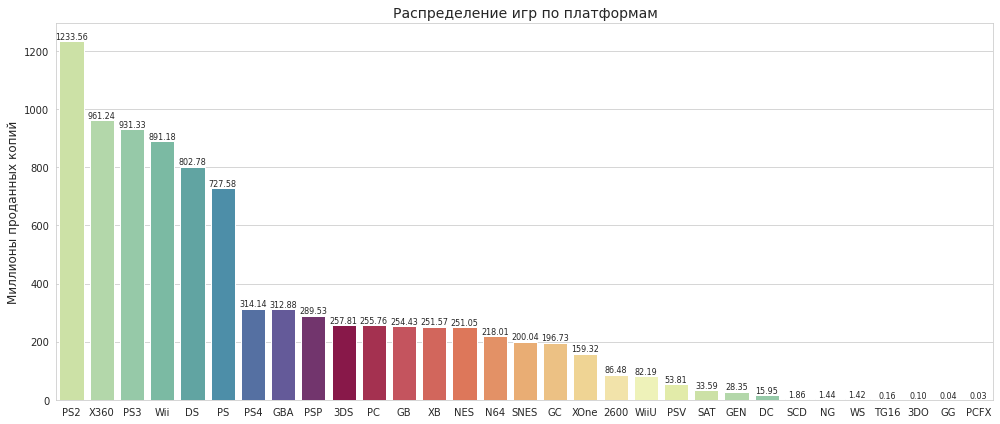

In [21]:
#строим график с суммами продаж по платформам
df_pivot(df,'platform','sum_sales','sum','Распределение игр по платформам','Миллионы проданных копий')

Наибольшее количество игр было продано для платформы `PlayStation 2`. После `PlayStation` начинается внушительный отрыв для продаж на всех остальных платформах. 

---

Посмотрим, как эти продажи шли по годам для лидеров рынка: чтобы проследить динамику, рассмотрим платформы до `Xbox One` включительно.

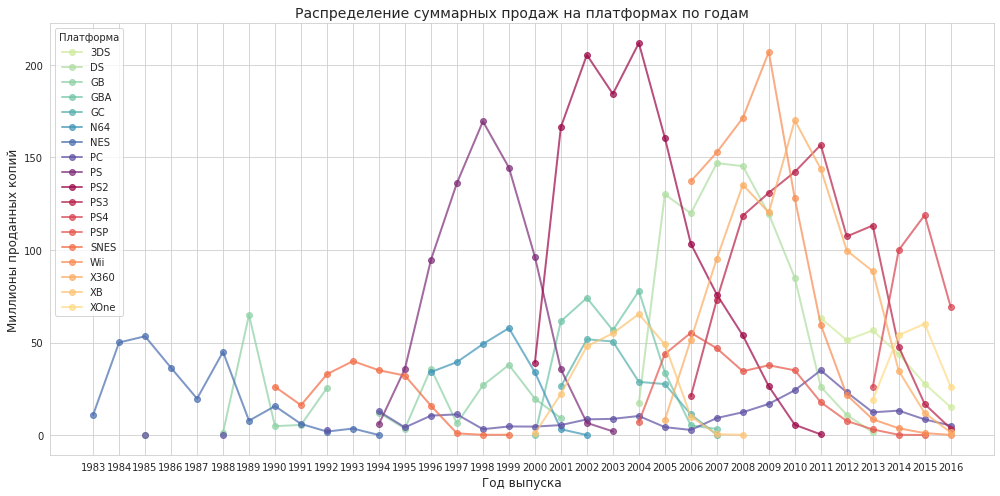

In [22]:
#отбираем самые продаваемые платформы до xone
top_platform = (df.groupby('platform')['sum_sales'].sum()
                .sort_values(ascending=False)
                .head(18))
#создаём сводную со срезом по индексации
top_pivot = (df.query('platform in @top_platform.index')
             .pivot_table(index='platform', columns='year_of_release', values='sum_sales', aggfunc='sum'))
#строим графики
plt.figure(figsize=(14, 7))
for platform in top_pivot.index:
    plt.plot(top_pivot.columns, top_pivot.loc[platform], marker='o', linewidth=2, alpha=0.7, label=platform)
plt.title('Распределение суммарных продаж на платформах по годам', fontsize=14)
plt.xlabel('Год выпуска', fontsize=12)
plt.ylabel('Миллионы проданных копий', fontsize=12)
plt.legend(title='Платформа')
plt.xticks(rotation=0)
plt.xticks(range(1983, 2017, 1))
plt.tight_layout()
plt.show()

In [23]:
#выводим сводную таблицу
top_pivot

year_of_release,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DS,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN,NaN,1.43,64.97,4.89,5.57,25.49,NaN,12.18,3.60,36.03,6.37,26.90,38.00,19.76,9.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.34,51.81,50.61,28.82,27.62,11.26,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.10,39.50,49.24,57.87,33.97,3.25,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NES,10.96,50.08,53.44,36.41,19.76,45.01,7.85,15.73,6.11,1.98,3.61,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC,NaN,NaN,0.04,NaN,NaN,0.03,NaN,NaN,NaN,3.03,NaN,12.87,4.22,10.58,11.27,3.26,4.74,4.66,5.47,8.57,8.84,10.39,4.37,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25
PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.03,35.96,94.70,136.17,169.49,144.53,96.37,35.59,6.67,2.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


На графике это малозаметно, но сводная таблица показывает, что на платформе DS есть неожиданная точка за 1985 год. Интернет пишет, что Nintendo DS был выпущен в 2004, что график подтверждает. Вероятно, в датасет закрались ошибочные данные.

Единственной платформой, которая сохраняет стабильность на протяжении длительного времени, является `PC`. Она была популярна с 1994 по 2016 год, хотя продажи также были в более ранние годы — 1985, 1988 и 1992. Несмотря на это, компьютерные игры остаются востребованными, даже не являясь лидерами продаж.

В отличие от `PC`, игровые консоли сменяют друг друга поколение за поколением. Каждая из них имеет свою культовую эпоху, после которой начинается расцвет новой модели. Обычно популярность платформ длится недолго — примерно 6–10 лет. Сначала за 2-4 года происходит взлёт, а затем начинается спад.

Поскольку наша задача — сделать прогноз на 2017 год, то стоит подробнее рассмотреть период, когда игры только выходят на пик популярности. Например, в 2013 году на рынке появились две новые игровые платформы: `PlayStation 4` и `Xbox One`. К этому времени выпущенная в 2011 году консоль `Nintendo 3DS` начала терять популярность, а `PlayStation 3` и `Xbox 360` стремительно теряли позиции, уступая место более современным аналогам.

Сам 2013 год может быть смазан из-за высоких продаж консолей прошлого поколения, но в 2014 году значения уже стабильно снижаются и не сильно навредят статистике. Судя по данным за 2016 год, это ведёт к закрытию поддержки этих консолей.

### Изучение актуального периода

In [24]:
#отсечём непрезентативные годы
actual_df = df.query('year_of_release >= 2014')
#проверим оставшийся датасет
actual_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16440
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   sum_sales        1689 non-null   float64
 9   critic_score     718 non-null    float64
 10  user_score       888 non-null    float64
 11  rating           1689 non-null   object 
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


В датасете, содержащем информацию о современных платформах, осталось 1689 строки данных. Примерно половина отзывов, оставленных пользователями и критиками, отсутствует.

In [25]:
#выведем статистику
display(actual_df.describe(include=['object']).T)
actual_df.describe().T

,count,unique,top,freq
name,1689,956,The LEGO Movie Videogame,8
platform,1689,10,PS4,376
genre,1689,12,Action,619
rating,1689,5,unknown,749


,count,mean,std,min,25%,50%,75%,max
year_of_release,1689.0,2014.953227,0.799624,2014.00,2014.00,2015.00,2016.00,2016.00
na_sales,1689.0,0.168182,0.446134,0.00,0.00,0.02,0.12,6.03
eu_sales,1689.0,0.160261,0.466846,0.00,0.00,0.02,0.12,6.31
jp_sales,1689.0,0.055115,0.211513,0.00,0.00,0.01,0.04,3.18
other_sales,1689.0,0.048324,0.141790,0.00,0.00,0.01,0.04,2.38
sum_sales,1689.0,0.431883,1.056109,0.01,0.03,0.10,0.35,14.63
critic_score,718.0,72.306407,12.213500,19.00,66.00,74.00,81.00,97.00
user_score,888.0,6.623536,1.589792,0.20,5.80,7.00,7.80,9.30


Если смотреть на количество игр с неопределённым рейтингом, мы потеряли почти половину информации. Самые маленькие суммарные продажи, как и прежде, на уровне 10 тысяч проданных копий, а наибольшие – 14,63 миллиона. Рассмотрим данные за последние годы.

#### Динамика продаж по годам

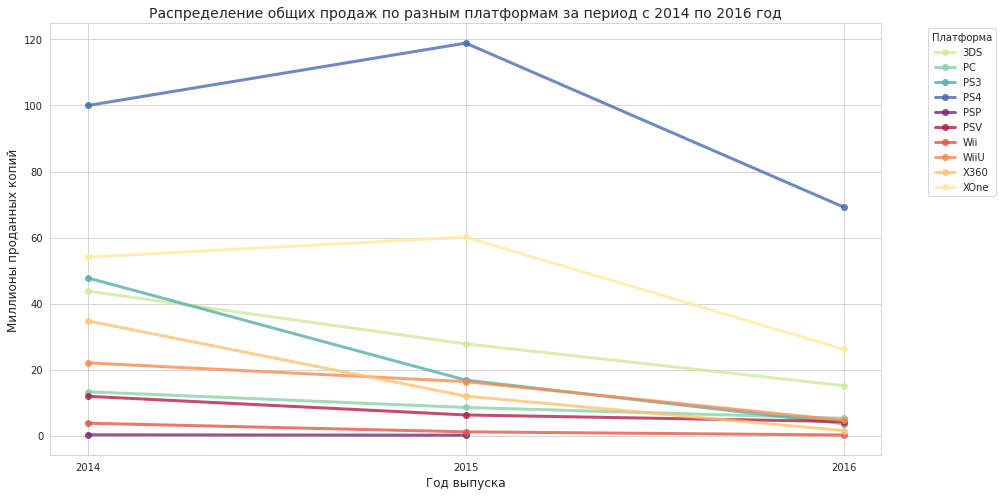

year_of_release,2014,2015,2016
platform,,,
3DS,43.76,27.78,15.14
PC,13.28,8.52,5.25
PS3,47.76,16.82,3.60
PS4,100.00,118.90,69.25
PSP,0.24,0.12,NaN
PSV,11.90,6.25,4.25
Wii,3.75,1.14,0.18
WiiU,22.03,16.35,4.60
X360,34.74,11.96,1.52


In [26]:
#создаём сводную таблицу за 13-16 годы
actual_pivot = actual_df.pivot_table(index='platform', columns='year_of_release', values='sum_sales', aggfunc='sum')
#строим графики
plt.figure(figsize=(14, 7))
for i, platform in enumerate(actual_pivot.index):
    plt.plot(actual_pivot.columns, actual_pivot.loc[platform], 
             marker='o', linewidth=3, alpha=0.8, label=platform, color=custom_palette[(2*i) % len(custom_palette)])
plt.title('Распределение общих продаж по разным платформам за период с 2014 по 2016 год', fontsize=14)
plt.xlabel('Год выпуска', fontsize=12)
plt.ylabel('Миллионы проданных копий', fontsize=12)
plt.legend(title='Платформа', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(2014, 2017, 1))
plt.tight_layout()
plt.show()
#выведем сводную таблицу
actual_pivot

Если учесть, что данные о продажах игр за 2016 год не полные, то можно сделать следующие выводы:
- После своего успеха `Nintendo 3DS` начала терять популярность, и эта тенденция продолжается.
- Игры для `PC` не пользуются большой популярностью, и их продажи постепенно снижаются. Однако, судя по предыдущему графику, их выпуск будет продолжаться.
- `PlayStation 3` теряет свою популярность, что может быть связано с появлением новой платформы `PlayStation 4`. 
- `PlayStation 4` быстро набирала популярность и стала лидером на рынке по объему продаж в 2015 году. В 2016 году сумма продаж `PlayStation 4` снизилась, но это может быть связано с неполными данными за последний год.
- Портативная консоль `PlayStation Portable` была выпущена в 2004 году и к 2015 году перестала продаваться.
- Портативная консоль `PlayStation Vita` имеет меньшие объемы продаж по сравнению с играми на компьютере и, судя по динамике, продолжит свое падение до полного забвения.
- Объемы продаж платформы `Wii` стабильно падают к 2016 году. Её приемница `Wii U` также теряет объемы продаж, хотя в 2015 году пыталась оставаться конкуренткой `PlayStation 3`.
- Консоль `Xbox 360` стремительно потеряла позиции. Это можно объяснить выходом на рынок консоли нового поколения `Xbox One`, которая, напротив, стала набирать популярность. 
- В 2016 году объемы продаж `Xbox One` меньше, но и информация по этому году — неполная. Эту консоль тоже можно считать лидером на рынке в 2016 году.

#### Анализ продаж на платформах

Поскольку `PlayStation Portable` больше не представлена на рынке, рассматривать продажи игр для этой консоли не имеет смысла. Давайте сосредоточимся на глобальных продажах оставшихся девяти платформ. 

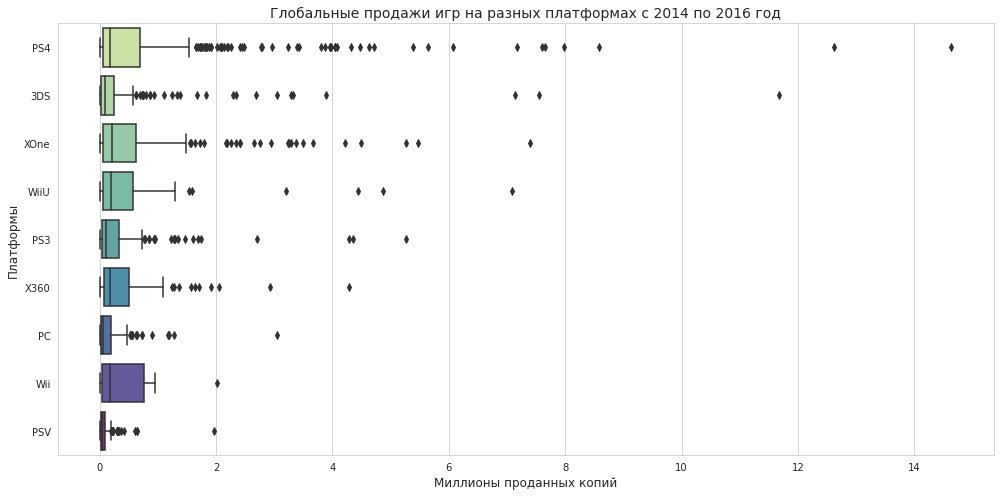

In [27]:
#убираем из данных информацию о psp
actual_df = actual_df.query('platform not in "PSP"')
#строим ящики с усами
plt.figure(figsize=(14, 7))
sns.boxplot(x='sum_sales', y='platform', data=actual_df, orient='h')
plt.title('Глобальные продажи игр на разных платформах с 2014 по 2016 год', fontsize=14)
plt.xlabel('Миллионы проданных копий', fontsize=12)
plt.ylabel('Платформы', fontsize=12)
plt.tight_layout()
plt.show()

Мы пока можем изучить только выбросы, но даже это даёт нам интересную информацию.
- Самой продаваемой игрой стала игра для `PlayStation 4`, было продано более 14 миллионов копий в определённый год.
- Ещё две платформы — `Nintendo 3DS`,`Xbox One` — также показали высокие результаты: было продано более 6 миллионов копий игр.
- У всех остальных платформ выбросы изредка превышают продажи в 1,9 миллионов копий.

---

Чтобы изучить подробнее сами «ящики с усами», необходимо значительно увеличить масштаб графика. Заодно посчитаем статистику, чтобы не только графики были перед глазами.

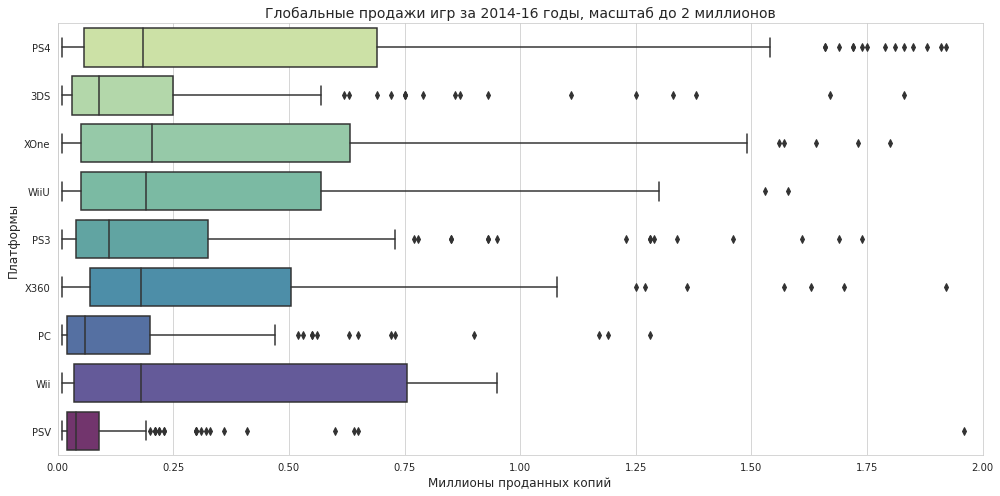

,count,mean,std,min,25%,50%,75%,max
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96


In [28]:
#увеличиваем масштаб графика по оси х
plt.figure(figsize=(14, 7))
sns.boxplot(x='sum_sales', y='platform', data=actual_df, orient='h')
plt.title('Глобальные продажи игр за 2014-16 годы, масштаб до 2 миллионов', fontsize=14)
plt.xlabel('Миллионы проданных копий', fontsize=12)
plt.ylabel('Платформы', fontsize=12)
plt.xlim(0, 2)
plt.tight_layout()
plt.show()
#посчитаем статистику для каждой платформы
platforms_2014 = ['PS4','3DS','XOne','WiiU','PS3','X360','PC','Wii','PSV']
stats_platform = pd.DataFrame()
for platform in platforms_2014:
    platform_stats = actual_df.query('platform == @platform')['sum_sales'].describe()
    stats_platform[platform] = platform_stats
stats_platform.T

С таблицей статистики всё меняется — и даже боксплоты становятся интереснее. Посмотрим на статистику продаж за период с 2014 по 2016 год на различных игровых платформах:

- `PlayStation Vita` — одна из наименее популярных игровых платформ, на которой тем не менее было выпущено 295 игр. Средний объём продаж составляет примерно 76 тысяч экземпляров, а медианный — всего 40 тысяч. Существуют игры, которые были распроданы в количестве до 1,96 миллиона копий, но это является редкостью.
- `Wii` — для этой платформы было создано всего 11 игр. Средний объём продаж составляет около 461 тысячи копий, а медианный — 180 тысяч. Самая популярная игра этой платформы была продана в количестве 2,01 миллиона копий, благодаря чему среднее значение продаж сместилось.
- `Wii U` — показывает лучшие результаты по сравнению с Wii. Было выпущено 73 игры, средний объём продаж составил около 589 тысяч копий, а медианный — 190 тысяч. Хотя лучшая игра была продана с 7,09 миллиона копий, в целом продажи не столь значительны.
- `PC` — игры для этой платформы показывают невысокие результаты. Средние продажи составляют около 179 тысяч копий, а медианные — всего 60 тысяч. Успехом можно считать продажу 3,05 миллиона копий, что бывает нечасто.
- `Nintendo 3DS` — популярность этой платформы снижается. Средний объём продаж составляет около 409 тысяч экземпляров, а медианный — всего 90 тысяч. Продажи более 60 тысяч копий, вплоть до 11,68 миллионов копий, являются редкостью.
- `PlayStation 3` — выпустила за последние три года 219 игр со средними продажами около 311 тысяч копий. Медиана составляет 110 тысяч. Самая успешная из игр была продана тиражом в 5,27 миллиона копий.
- `Xbox 360` — хотя и теряет популярность, демонстрирует неплохие результаты. Было выпущено 111 игр, средний объём продаж составляет около 434 тысяч копий, а медианный — 180 тысяч. Самая успешная игра разошлась тиражом в 4,28 миллиона экземпляров.
- `Xbox One` — показывает рекордные значения по медиане: 205 тысяч — и средними продажами около 616 тысяч. Самая успешная игра была продана в объёме 7,39 миллиона копий, а так как у половины игр объёмы продаж выше медианного значения, это указывает на их высокую востребованность.
- `PlayStation 4` — лидер с рекордной продажей игры в 14,63 миллиона копий, а также по средним продажам на игру — около 766 тысяч копий. Медиана при этом составляет 185 тысяч, что успупает лишь медианным значениям у Xbox One. Это говорит о популярности игр для этой консоли.

За рассматриваемый период самыми популярными игровыми платформами стали `PlayStation 4` и `Xbox One`. Они демонстрируют высокие средние продажи игр и медианные значения по продажам. И это несмотря на большое количество выпущенных игр.

#### Корреляция продаж и оценок

Посмотрим, как отзывы критиков и пользователей влияют на продажи `PlayStation 4`. Сравним эти результаты с показателями других платформ. 

Для работы с графиками и расчёта корреляций между различными платформами создадим функцию. Кроме корреляции Пирсона, мы также будем использовать метод Phik для анализа связей с другими показателями.

In [29]:
#создадим функцию для вывода диаграмм рассеяния и корреляции
def scatter_platform(df, platform):
    platform_df = df[df['platform'] == platform]
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(f'Платформа: {platform}', fontsize=16)
    print('Корреляция продаж и оценок критиков:', platform_df['sum_sales'].corr(platform_df['critic_score']))
    print('Корреляция продаж и оценок пользователей:', platform_df['sum_sales'].corr(platform_df['user_score']))
    #диаграмма рассеяния для продаж и оценок критиков
    sns.scatterplot(ax=axes[0], x='critic_score', y='sum_sales', data=platform_df, color=['#486caf'], alpha=0.7)
    axes[0].set_title('Корреляция продаж и оценок критиков', fontsize=14)
    axes[0].set_xlabel('Оценки критиков', fontsize=12)
    axes[0].set_ylabel('Миллионы проданных копий', fontsize=12)
    #диаграмма рассеяния для продаж и оценок пользователей
    sns.scatterplot(ax=axes[1], x='user_score', y='sum_sales', data=platform_df, color=['#486caf'], alpha=0.7)
    axes[1].set_title('Корреляция продаж и оценок пользователей', fontsize=14)
    axes[1].set_xlabel('Оценки пользователей', fontsize=12)
    axes[1].set_ylabel('Миллионы проданных копий', fontsize=12)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    #вычисляем φk корреляций
    phik_matrix = (platform_df[['na_sales','eu_sales','jp_sales','other_sales','sum_sales',
                              'year_of_release','genre','rating','critic_score','user_score']]
                   .phik_matrix(interval_cols=['critic_score','user_score','na_sales','eu_sales',
                                               'jp_sales','other_sales','sum_sales']))
    #тепловая карта корреляций методом phik
    plt.figure(figsize=(18, 4))
    ax = sns.heatmap(phik_matrix, annot=True, fmt=".2f", cmap=sns.color_palette('Spectral', as_cmap=True).reversed())
    plt.title('Матрица корреляций методом Phik', fontsize=14)
    ax.axhline(y=phik_matrix.index.get_loc('critic_score'), color='black', linewidth=3)
    ax.axvline(x=phik_matrix.columns.get_loc('sum_sales'), color='black', linewidth=2.3)
    ax.axvline(x=phik_matrix.columns.get_loc('sum_sales') + 1, color='black', linewidth=2.3)
    plt.show()

Корреляция продаж и оценок критиков: 0.40266141068104083
Корреляция продаж и оценок пользователей: -0.040131589472697356


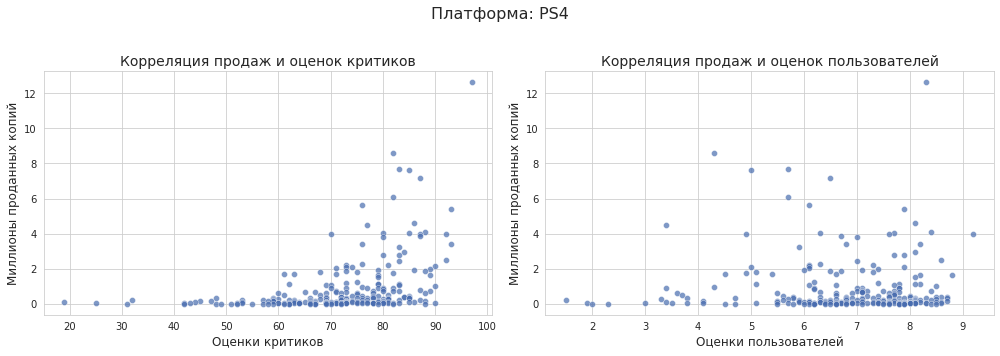

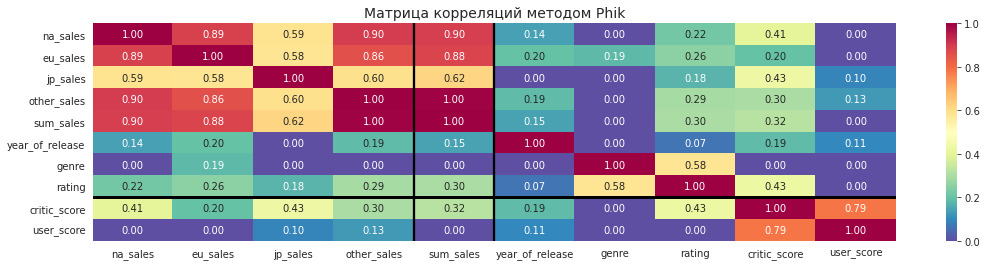

In [30]:
#выводим графики и считаем корреляцию по playstation 4
scatter_platform(actual_df, 'PS4')

Как мы видим, для игр для `PlayStation 4` есть небольшая корреляция между общими объёмами продаж и оценками критиков. Метод Phik показывает, что существует слабая, но всё же связь между этими характеристиками. Умеренная связь наблюдается между оценками критиков и продажами в Японии и Северной Америке. 

Оценки пользователей не коррелируют с объёмом продаж. Однако есть очень слабая связь между оценками пользователей и объёмами продаж в Японии и других регионах, но не в Северной Америке и Европе.

Интересно, что между объёмами продаж есть слабая связь с рейтингом и даже очень слабая связь с годом выпуска. Меньше всего на общие объёмы продаж влияют продажи из Японии.

Корреляция продаж и оценок критиков: 0.42867694370333226
Корреляция продаж и оценок пользователей: -0.0703839280647581


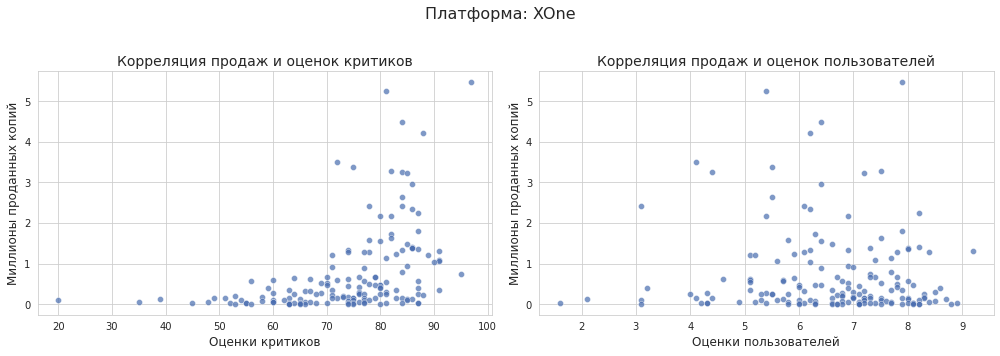

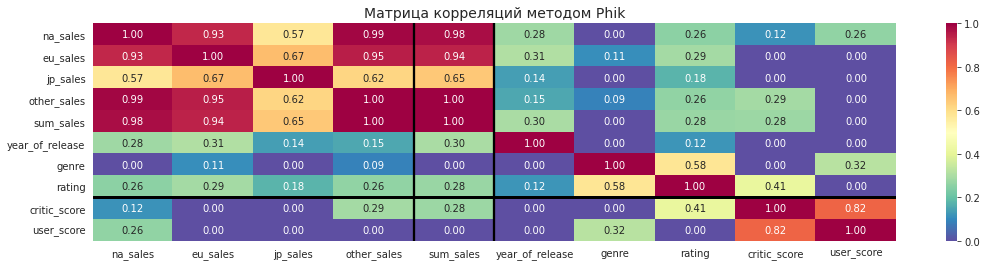

In [31]:
#выводим графики и считаем корреляцию по xbox one
scatter_platform(actual_df, 'XOne')

Для `Xbox One` корреляция между оценками критиков и общим объёмом продаж немного выше, чем для PlayStation 4. Однако связь между оценками и продажами в матрице корреляций Phik слабее, чем у PlayStation 4.

С оценками пользователей и общим объёмом продаж корреляция также отсутствует, но есть слабая связь с продажами в Северной Америке. Оценки критиков в Америке оказывают меньшее влияние на продажи, чем в других регионах. При этом они не влияют на объёмы продаж в Европе и Японии.

Связь с общими объёмами продаж и годом выпуска игры слабая, но несколько слабее, чем с рейтингом. Как и в случае с PlayStation 4, на общие продажи наименьшее влияние оказывают продажи в Японии.

Корреляция продаж и оценок критиков: 0.44657460493190704
Корреляция продаж и оценок пользователей: -0.16676141347662116


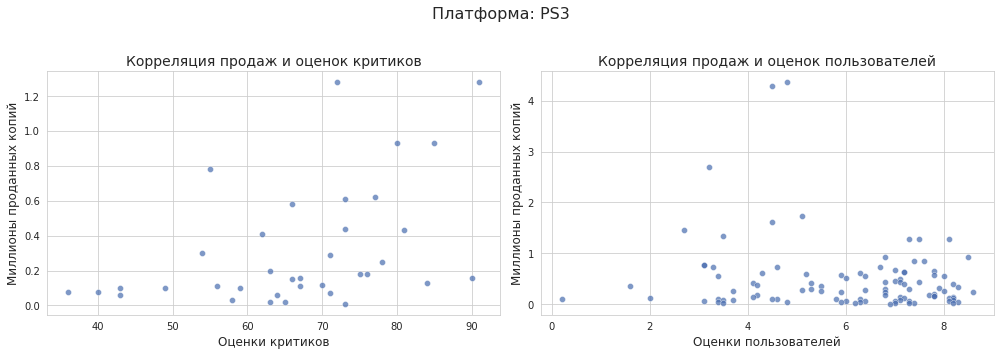

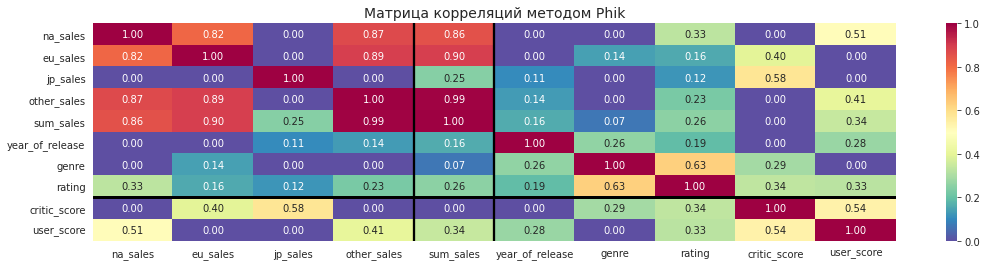

In [32]:
#выводим графики и считаем корреляцию по playstation 3
scatter_platform(actual_df, 'PS3')

Интересно, что для `PlayStation 3` корреляция между общими продажами и оценками критиков ещё на 0,02 выше. Однако матрица методом Phik показывает обратное: c общими продажами связи нет, а вот продажи в Японии и Европе связаны с объёмами продаж умеренно.

Такая же ситуация наблюдается и с корреляцией пользовательских оценок с продажами: на графике рассеивания и рассчитанной корреляции связи нет, а матрица методом Phik указывает на слабую связь. Однако с продажами в Северной Америке и других регионах связь с оценками пользователей — умеренная.

С общими объёмами продаж есть слабая связь с рейтингом игр на платформе, а с годом выпуска и жанром связь между продажами очень слабая. Продажи в Японии тоже слабо связаны с общими объёмами продаж.

Корреляция продаж и оценок критиков: 0.5257228356581523
Корреляция продаж и оценок пользователей: -0.138444570945665


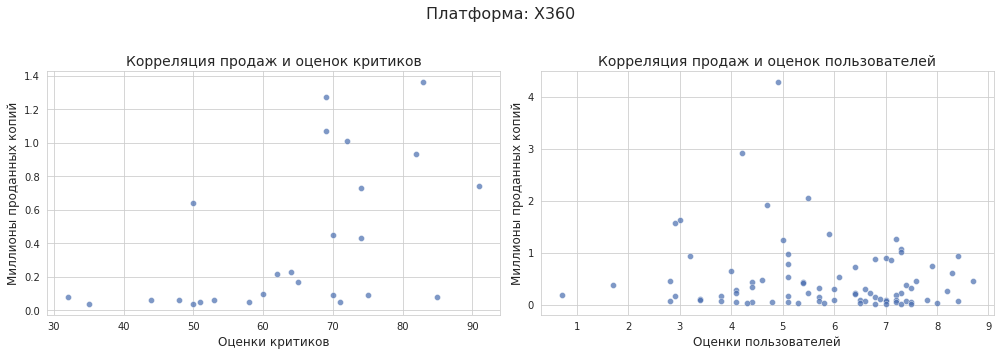

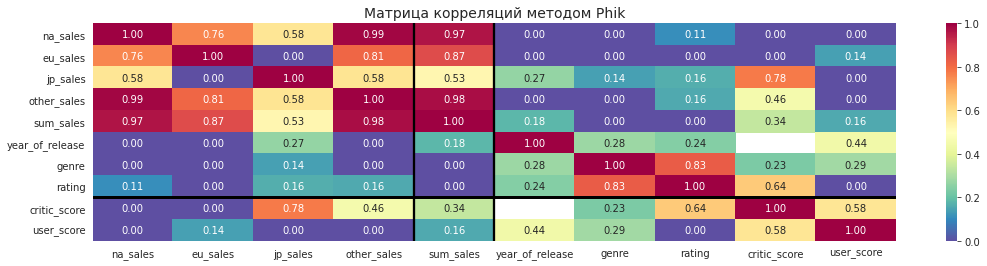

In [33]:
#выводим графики и считаем корреляцию по xbox 360
scatter_platform(actual_df, 'X360')

Критиков, оценивавших игры для платформы `Xbox 360`, было очень мало, и их оценки относятся только к одному году, если судить по пропускам в матрице корреляций.

Корреляция между объёмами продаж и оценками критиков для этой платформы выше, чем для предыдущих, но матрица, построенная методом Phik, указывает на слабую связь между этими показателями. Сильная связь прослеживается только между оценками критиков и продажами в Японии, а в других регионах она умеренная или отсутствует вовсе.

Оценки пользователей и объёмы продаж не зависят друг от друга. Анализ общих продаж и оценок пользователей по методу Phik показывает, что связь между ними очень слабая. Это подтверждается очень слабой связью с продажами в Европе и отсутствием корреляции с другими регионами.

Общие суммы продаж имеют очень слабую связь с годом выпуска игр. Среди региональных продаж хуже всего корреляция с общим объёмом в Японии.

Корреляция продаж и оценок критиков: 0.31411749286905105
Корреляция продаж и оценок пользователей: 0.2151932718527028


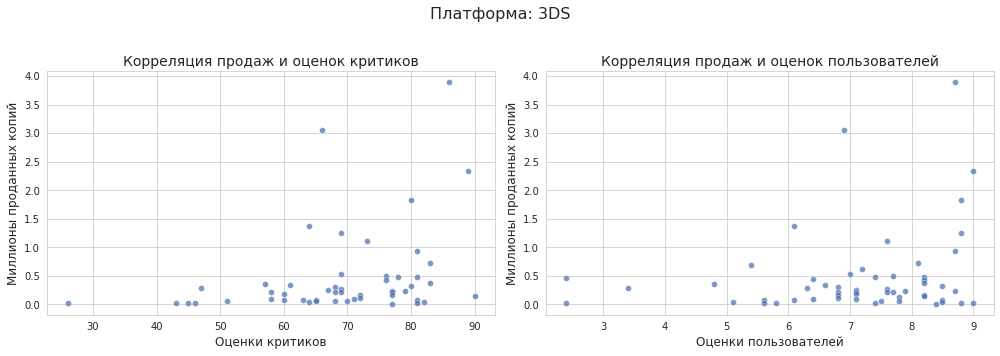

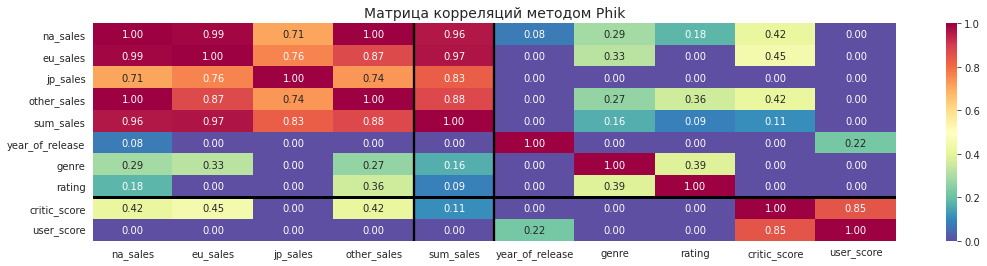

In [34]:
#выводим графики и считаем корреляцию по nintendo 3ds
scatter_platform(actual_df, '3DS')

Любопытно, что корреляция между продажами и оценками критиков на `Nintendo 3DS` гораздо меньше, чем на других консолях. В то же время корреляция между оценками пользователей и продажами не так сильно отличается от корреляции продаж и оценок критиков.

Матрица корреляций, созданная с помощью метода Phik, показывает, что существует слабая связь между объёмами продаж и оценками критиков. Однако есть умеренная связь между оценками критиков и продажами в Северной Америке, Европе и других регионах. Что касается связи между оценками пользователей и продажами, то она не подтверждается ни по регионам, ни в целом.

Общие объёмы продаж имеют очень слабую связь с жанром игр и их рейтингом. Все региональные продажи имеют очень сильную связь с общими продажами.

Корреляция продаж и оценок критиков: 0.17463413769350036
Корреляция продаж и оценок пользователей: -0.07159665703472452


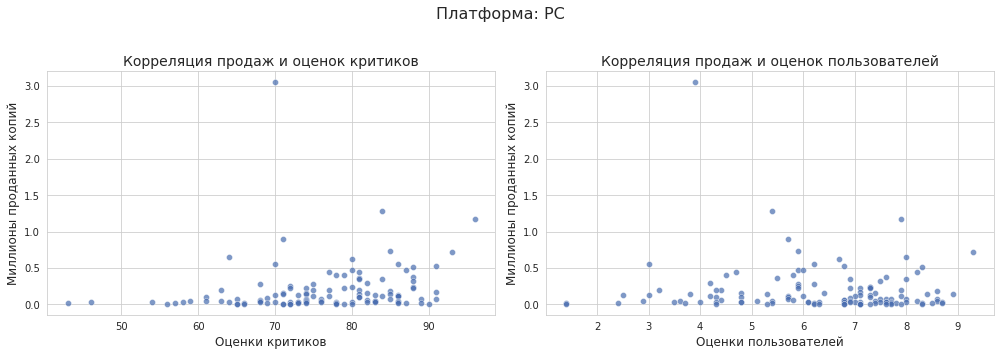

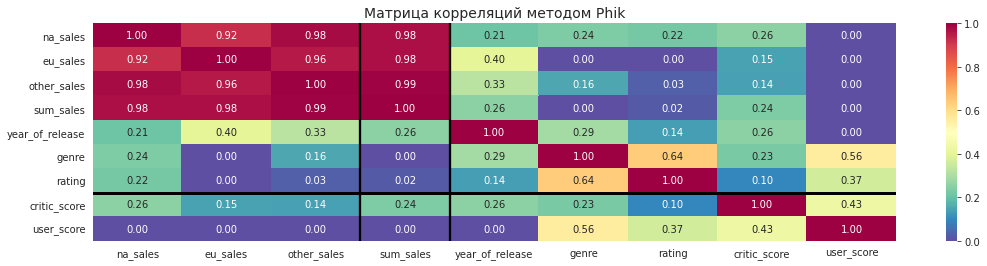

In [35]:
#выводим графики и считаем корреляцию по пк
scatter_platform(actual_df, 'PC')

В завершение рассмотрим компьютерные игры. 

Первое, что стоит отметить: в Японии эти игры не пользуются спросом. При этом нет явной корреляции между общими продажами, оценками критиков и пользователей. Возможно, это связано с тем, что компьютерные игры больше других страдают от пиратства, в то время как консоли в этом отношении более защищены.

По матрице корреляций, построенной методом Phik, можно заметить слабую связь между продажами и оценками критиков, а также отсутствие связи между продажами и оценками пользователей.

Также есть слабая связь между общим объёмом продаж и годом выпуска игр.

---

Подводя итог, можно сказать, что оценки критиков играют небольшую роль в объёмах продаж на большинстве платформ. В то же время оценки пользователей не оказывают существенного влияния на продажи.

#### Анализ продаж по жанрам

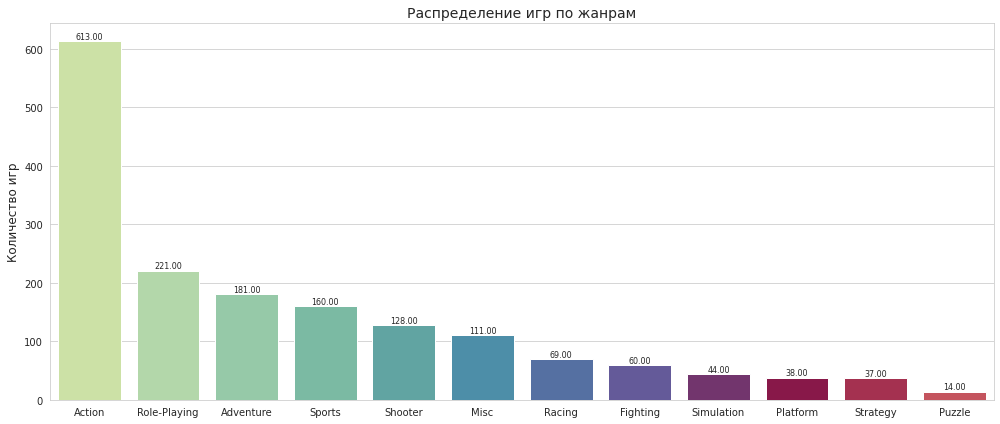

In [36]:
#строим график с количеством игр по жанрам
df_pivot(actual_df,'genre','name','count','Распределение игр по жанрам','Количество игр')

Среди жанров игр чаще всего выпускают игры в жанре экшен, или `Action`. За период с 2014 по 2016 год вышло 613 игр этого жанра. На втором месте — ролевые игры, `Role-Playing`, их было выпущено 221. А вот меньше всего за этот период вышло игр в жанре головоломок, или `Puzzle`.

Рассмотрим эти жанры с точки зрения общих объёмов продаж на рынке.

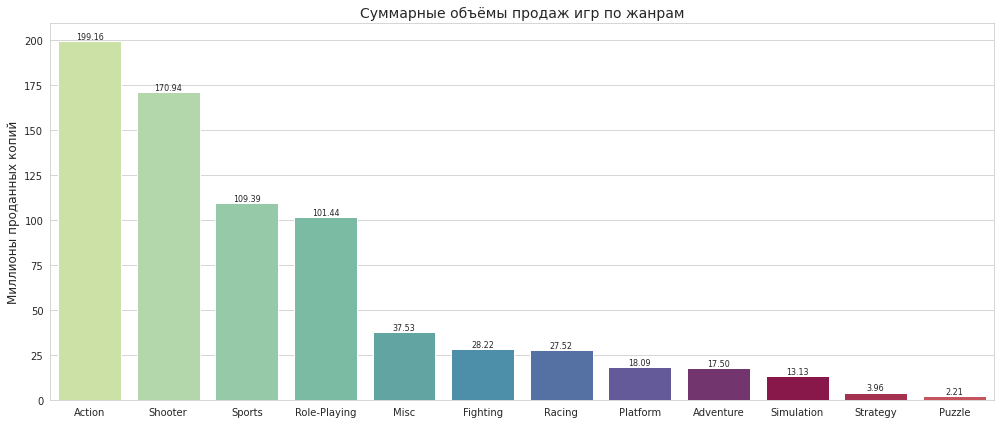

In [37]:
#строим график с общими продажами игр по жанрам
df_pivot(actual_df,'genre','sum_sales','sum','Суммарные объёмы продаж игр по жанрам','Миллионы проданных копий')

Больше всего было продано игр жанра `Action` — почти 200 миллионов копий. На втором месте по продажам — игры в жанре `Shooter`, их было продано около 170 миллионов копий. С небольшим отрывом друг от друга следуют жанры `Sports` и `Role-Playing`, где было продано 109,39 и 101,44 миллиона копий соответственно. Наименьшие объёмы продаж у игр жанра `Puzzle`.

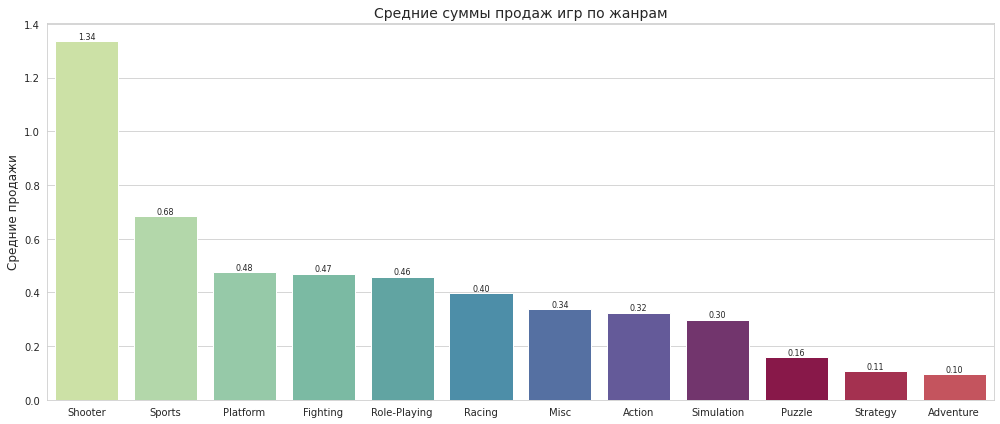

In [38]:
#строим график со средними продажами игр по жанрам
df_pivot(actual_df,'genre','sum_sales','mean','Средние суммы продаж игр по жанрам','Средние продажи')

Среди всех жанров наиболее популярными оказались `Shooter`: было продано 1,34 миллиона копий игр этого жанра. На втором месте по популярности с отставанием почти в два раза оказались `спортивные игры`. А на третьем месте расположились сразу три жанра: `Platform`, `Fighting` и `ролевые игры`, средние суммы продаж которых отличаются друг от друга всего лишь на 10 тысяч проданных копий. Наименее востребованным оказался жанр Adventure.

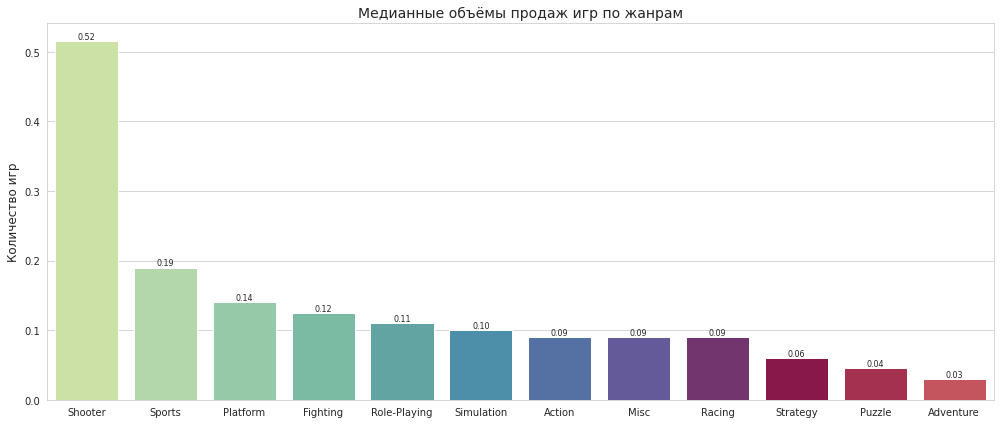

In [39]:
#строим график с медианными продажами игр по жанрам
df_pivot(actual_df,'genre','sum_sales','median','Медианные объёмы продаж игр по жанрам','Количество игр')

Вновь лидирует жанр `Shooter`, демонстрируя высокие показатели продаж. Половина игр этого жанра была продана в количестве более 520 тысяч копий. В то же время, медианные суммы для `спортивных игр` в среднем около 190 тысяч копий.

Также стоит отметить, что жанры `Platform`, `Fighting` и `Role-Playing` сохранили свои позиции с небольшими отличиями. Например, в жанре Platform продажи составили около 140 тысяч копий, что на 20 тысяч больше, чем у остальных жанров.

В конце списка находится жанр `Adventure` с продажами в размере 30 тысяч копий.

В целом можно выделить такие жанры игр, как «стрелялки» и «бегалки», особенно если они сочетают в себе оба этих направления.

#### Анализ продаж в регионах

In [40]:
#создаём функцию для круговых диаграмм
def pie_charts(df, groupby, suptitle):
    #собираем информацию топ-5 и остальных
    def get_data(df, sales_col):
        sales = df.groupby(groupby)[sales_col].sum().sort_values(ascending=False)
        top_sales = sales.nlargest(5)
        other_sales = sales.iloc[5:].sum()
        top_sales['Other'] = other_sales
        return top_sales
    top_na = get_data(df, 'na_sales')
    top_eu = get_data(df, 'eu_sales')
    top_jp = get_data(df, 'jp_sales')
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(suptitle, fontsize=16)
    #для северной америки
    axes[0].pie(top_na, labels=top_na.index, autopct='%.1f%%', colors=[custom_palette[i] for i in [12, 15, 18, 2, 6, 8]])
    axes[0].set_title('Северная Америка', fontsize=14)
    #для европы
    axes[1].pie(top_eu, labels=top_eu.index, autopct='%.1f%%', colors=[custom_palette[i] for i in [12, 15, 18, 2, 6, 8]])
    axes[1].set_title('Европа', fontsize=14)
    #для японии
    axes[2].pie(top_jp, labels=top_jp.index, autopct='%.1f%%', colors=[custom_palette[i] for i in [12, 15, 18, 2, 6, 8]])
    axes[2].set_title('Япония', fontsize=14)
    plt.tight_layout()
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

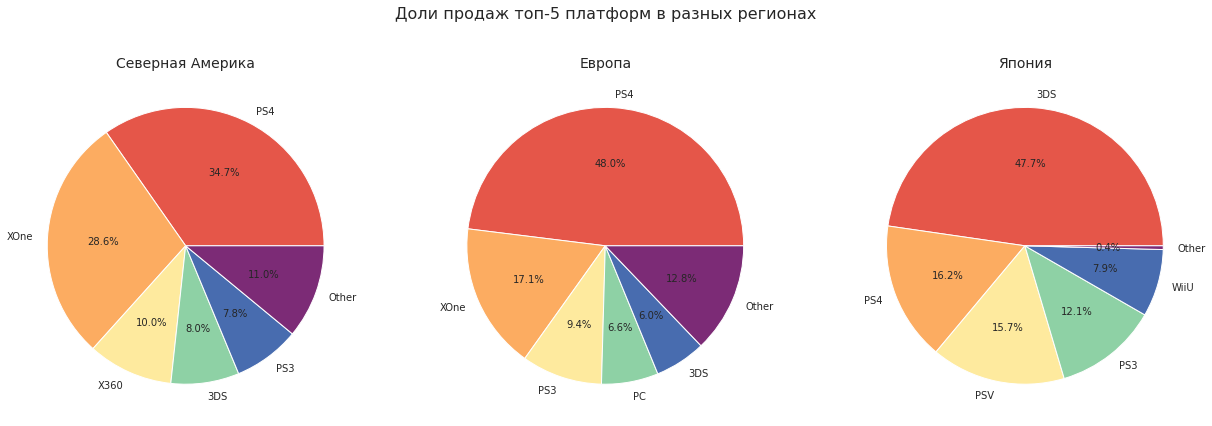

In [41]:
#диаграммы для платформ
pie_charts(actual_df, 'platform', 'Доли продаж топ-5 платформ в разных регионах')

- В период с 2014 по 2016 годы в Северной Америке самой популярной игровой консолью была `PlayStation 4`. На втором месте находилась модель `XOne` от Xbox, выпущенная в том же году. Соотношение между ними было близким: 34,7% и 28,6% от общего числа игровых платформ соответственно.
- Похожая ситуация наблюдалась и в Европе, где `PlayStation 4` пользовалась ещё большой популярностью: 48% против 17,1% у `Xbox One`. Общий уровень популярности самых свежих игровых консолей в этих двух регионах не вызывает удивления.
- Однако более интересным фактом является то, что в Японии даже `PlayStation 4` занимает лишь второе место по популярности, занимая лишь 16,2% от общего числа игр. При этом почти половину игр на рынке — 47,7% — занимают игры, выпущенные для `Nintendo 3DS`.

В целом, последние три места в рейтинге популярности игровых консолей распределились следующим образом:
- В Северной Америке после популярных `PlayStation 4` и `Xbox One` продаются игры для `Xbox 360`, `Nintendo 3DS` и `PlayStation 3`.
- В Европе после освоения новых консолей продолжают играть на `PlayStation 3`, в `компьютерные игры` и `Nintendo 3DS`.
- А в Японии после бешеной популярности `Nintendo 3DS` пользователей привлекают игры ещё для `PlayStation Vita`, `PlayStation 3` и `Wii U`. И, как мы помним, там вообще не покупают игры на PC.

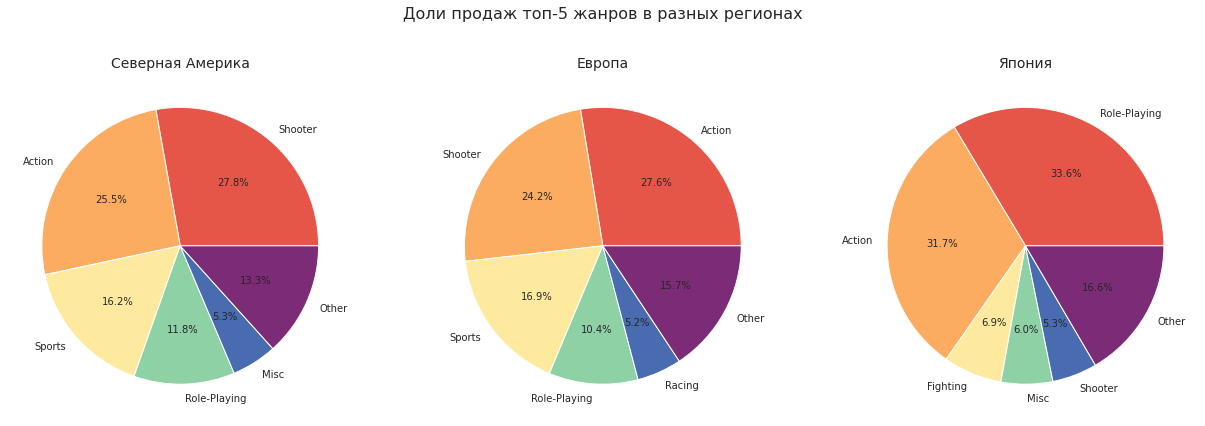

In [42]:
#диаграммы для жанров
pie_charts(actual_df, 'genre', 'Доли продаж топ-5 жанров в разных регионах')

В разных регионах популярны разные жанры игр. Три жанра — `Shooter`, `Action` и `Role-Playing` — встречаются во всех трёх регионах, но их популярность отличается.

- В Северной Америке больше всего любят игры в жанре `Shooter`, хотя `экшен-игры` тоже очень популярны: 27,8% и 25,5% соответственно. `Ролевые игры` занимают четвёртое место с 11,8%.

- В Европе `экшен-игры` популярнее, чем `шутеры`, но разница между долями жанров также небольшая: 27,6% и 24,2% соответственно. `Ролевые игры` тоже пользуются спросом, но они уступают спортивным играм.

- Японские пользователи предпочитают `ролевые игры`, но `экшен-игры` также очень популярны: 33,6% и 31,7% соответственно. `Шутеры` занимают всего 5,3% на японском рынке, а третье и четвёртые места заняли игры в жанрах `Fighting` и `Misc`. В целом, после популярности ролевых игр и экшена, остальные жанры занимают всего треть на рынке, что явно указывает на предпочтения японских игроков.

Таким образом, американцы и европейцы предпочитают активные игры, где нужно много бегать и стрелять. Игроки из этих регионов любят активность, не выходя из дома. Японские пользователи же любят ролевые игры, где можно бегать в образе других персонажей.

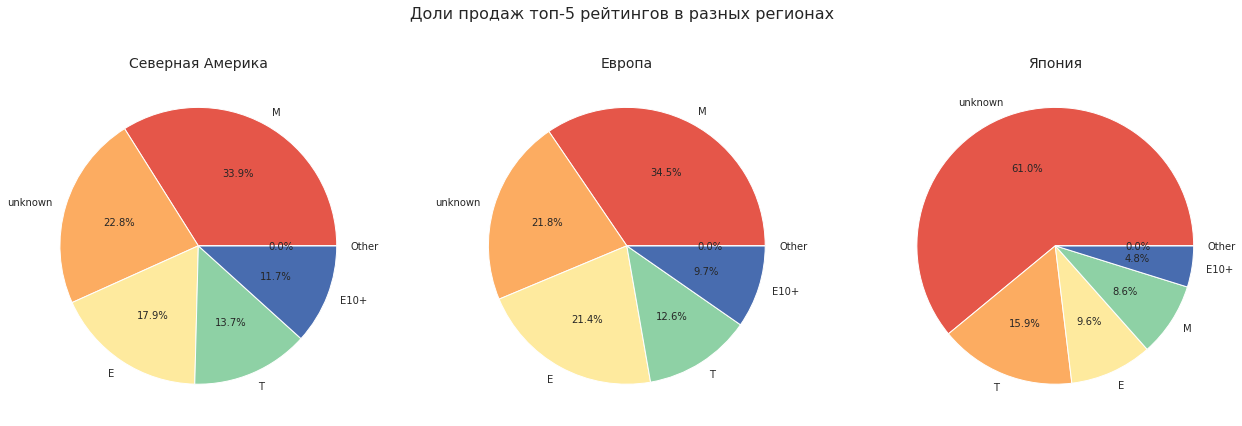

In [43]:
#диаграммы для рейтингов
pie_charts(actual_df, 'rating', 'Доли продаж топ-5 рейтингов в разных регионах')

В период с 2014 по 2016 год игры были представлены в пяти жанрах, и в категории «другие» их не было.

Рассмотрим, как распределяются игры по рейтингам в **Северной Америке** и **Европе**. Доли рейтингов в этих регионах незначительно отличаются, поэтому мы можем объединить их для анализа.

- В Северной Америке и Европе наибольшая доля игр имеет рейтинг `М`, то есть предназначается для пользователей старше 17 лет. Это было особенно актуально для шутеров, которые пользуются большой популярностью в этих регионах. Причина такого решения очевидна: кровавые сцены не подходят для детской аудитории.
- Ещё около 22% игр `не имели определённого` рейтинга. Возможно, в этом списке были игры, которым ещё не присвоили оценку.
- Следующими по популярности идут игры с рейтингами `Е`, `Т` и `Е10+`. Они предназначены для всех возрастов, подростков от 13 лет и детей от 10 соответственно.

В **Японии** ситуация отличается от западного игрового мира:
- Чаще всего у игр `нет определённого` рейтинга, что для Японии может объясняться иным подходом к оценке возрастных рейтингов.
- Суммарно количество проданных игр с рейтингами `Е`, `М` и `Е10+` занимает менее 30% от доли игрового рынка. Это говорит о том, что для пользователей этих категорий есть много вариантов среди игр со своими собственными критериями оценки рейтинга.
- Несколько выделяются игры для подростков `от 13 лет`, которые занимают 15,9% от общей доли игр в Японии. Это значение даже больше, чем для пользователей из Северной Америки и Европы.

---

Вернёмся к предыдущии матрицам корреляции, построенным с помощью метода Phik, чтобы понять, как рейтинг влияет на продажи игр для разных игровых платформ.
- Для `PlayStation 4` связь между продажами и рейтингом была слабой в Северной Америке и Европе, а в Японии связь была очень слабой.
- У `Xbox One` также наблюдались слабые связи между продажами в Северной Америке и Европе, хотя они были сильнее, чем у PlayStation 4. Продажи в Японии демонстрировали такую же очень слабую корреляцию с рейтингами игр.
- Что касается продаж игр на `PlayStation 3`, то только в Северной Америке была выявлена слабая связь с рейтингами. В Европе и Японии продажи коррелировали с рейтингами очень слабо.
- Для `Xbox 360` продажи в Северной Америке и Японии имели слабую связь с рейтингами, а в Европе связи не обнаружено.
- Для `Nintendo 3DS` была выявлена очень слабая связь только между рейтингами и продажами в Северной Америке. В Европе и Японии рейтинги не влияли на продажи.
- В Японии все рейтинги не имели значения для компьютерных игр, поскольку там не продавались игры для `PC`. В Северной Америке наблюдалась слабая связь между рейтингами и продажами, а в Европе связь не подтвердилась.

Посмотрим, как рейтинг игр влияет на продажи в регионах. Чтобы понять, какие рейтинги и в какой степени влияют на продажи, создадим новый датасет. В этом наборе данных будут содержаться сведения о суммах продаж по регионам, общий рейтинг и каждый из них по отдельности. Затем мы применим к датасету метод Phik, который поможет нам оценить влияние каждого рейтинга на продажи в каждом регионе.

In [44]:
#создаём новый датасет со столбцами по каждому рейтингу
rating_dummies = pd.get_dummies(actual_df['rating'])
#заменяем значения 1 и 0 в получившемся датасете
for rating in rating_dummies.columns:
    rating_dummies[rating] = np.where(rating_dummies[rating] == 1, rating, np.nan)
#объединяем нужные столбцы с новыми
actual_rating = pd.concat([actual_df[['na_sales', 'eu_sales', 'jp_sales', 'rating']], rating_dummies], axis=1)
#проверяем результат
actual_rating.head()

,na_sales,eu_sales,jp_sales,rating,E,E10+,M,T,unknown
31,6.03,5.86,0.36,unknown,nan,nan,nan,nan,unknown
42,3.96,6.31,0.38,M,nan,nan,M,nan,nan
47,4.35,3.49,3.10,unknown,nan,nan,nan,nan,unknown
77,1.12,6.12,0.06,E,E,nan,nan,nan,nan
87,2.99,3.49,0.22,unknown,nan,nan,nan,nan,unknown


Шалость удалась. Мы подготовили необходимый нам датасет. Теперь можно приступить к созданию матрицы корреляции.

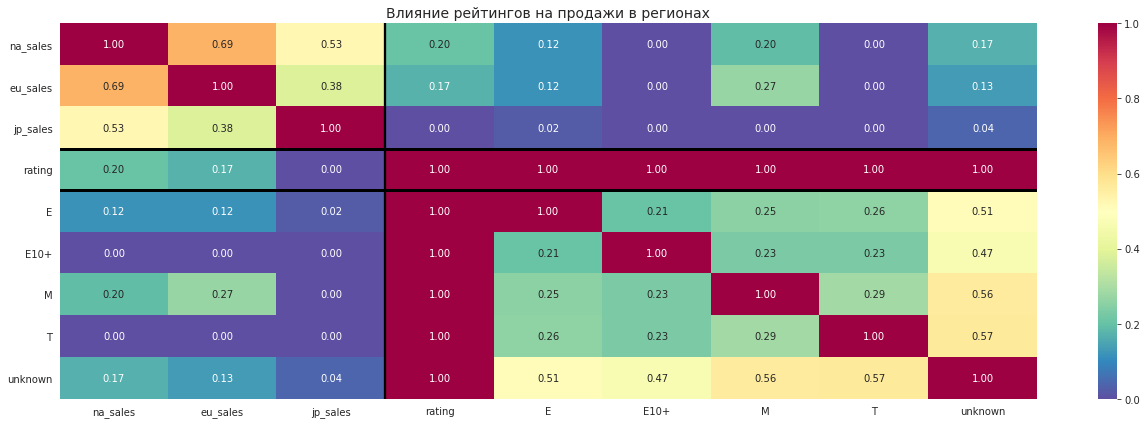

In [45]:
#вычисляем φk корреляций
phik_matrix = (actual_rating.phik_matrix(interval_cols=['na_sales','eu_sales','jp_sales']))
#тепловая карта корреляций методом phik
plt.figure(figsize=(18, 6))
ax = sns.heatmap(phik_matrix, annot=True, fmt=".2f", cmap=sns.color_palette('Spectral', as_cmap=True).reversed())
plt.title('Влияние рейтингов на продажи в регионах', fontsize=14)
ax.axhline(y=phik_matrix.index.get_loc('rating'), color='black', linewidth=3)
ax.axhline(y=phik_matrix.index.get_loc('rating') + 1, color='black', linewidth=3)
ax.axvline(x=phik_matrix.index.get_loc('rating'), color='black', linewidth=2.3)
plt.tight_layout()
plt.show()

Как мы видим, общий рейтинг не имеет прямой связи с объёмами продаж игр в Северной Америке и Европе, связь очень слабая. В Японии же рейтинг вообще не влияет на продажи. Однако, если рассмотреть ситуацию более детально, можно заметить следующее:
- Есть слабая связь между общим рейтингом и продажами игр с рейтингом `М` в Европе. В Северной Америке же связь между рейтингом `М` и продажами слабее.
- Наблюдается очень слабая связь между продажами игр в Северной Америке и Европе с рейтингами `Е` и `unknown`. Даже в Японии подтверждается минимальная связь между продажами и рейтингами игр с кодовым названием `unknown` и, в очень маленькой степени, с рейтингом `Е`.

Обращаясь к ранее рассмотренным диаграммам, мы можем увидеть, что самые большие объёмы продаж игр в Северной Америке и Европе были с рейтингами `М`, `unknown` и `Е`, что вполне согласуется с построенной матрицей. В то же время в Японии самыми популярными были игры с рейтингами `unknown` и `Т`, но корреляция объёмов продаж с рейтингом `Т` не подтвердилась.

## Проверка гипотез

Нулевая и альтернативная гипотезы для сравнения средних пользовательских оценок консолей `Xbox One` и `PC` будут следующими:
- **Гипотеза H0**: Средние оценки пользователей для Xbox One и компьютерных игр одинаковы.
- **Гипотеза H1**: Средние оценки пользователей для консоли Xbox One и компьютерных игр отличаются.

Чтобы проверить эти гипотезы, сделаем два среза без пропусков в оценках пользователей: один для игр на `Xbox One`, другой — для игр на `PC`. Так как эти две выборки не зависеть друг от друга, статистический тест проведём с использованием t-распределения. Поскольку у игр на `PC` было меньше продаж, чем у `Xbox One`, мы будем использовать уровень статистической значимости 5%. 

In [46]:
#уровень статистической значимости
alpha = 0.05 
#проверяем гипотезу, сравнивая срезы
results = st.ttest_ind(actual_df.query('platform == "XOne"').dropna(subset=['user_score'])['user_score'], 
                       actual_df.query('platform == "PC"').dropna(subset=['user_score'])['user_score'])
p_value = results.pvalue
print('Среднее значение оценок пользователей для платформы Xbox One:', 
      actual_df.query('platform == "XOne"').dropna(subset=['user_score'])['user_score'].mean())
print('Среднее значение оценок пользователей для компьютерных игр:', 
      actual_df.query('platform == "PC"').dropna(subset=['user_score'])['user_score'].mean())
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Среднее значение оценок пользователей для платформы Xbox One: 6.594545454545456
Среднее значение оценок пользователей для компьютерных игр: 6.298360655737705
p-value: 0.10450507919348415
Нет оснований отвергнуть нулевую гипотезу


Поскольку значение p-value больше установленного уровня статистической значимости в 5%, мы не можем опровергнуть нулевую гипотезу. Это позволяет нам предположить, что средние оценки пользователей на платформах `Xbox One` и `PC` одинаковы.
    
Средние оценки на обеих платформах практически не отличаются. Это подтверждает, что мы правильно выбрали метод Стьюдента для сравнения результатов и условия для его применения были соблюдены.

---

Нулевая и альтернативная гипотезы для сравнения пользовательских оценок игр в жанрах `«экшен»` и `«спортивные соревнования»` будут такими:
- **Гипотеза H0**: средние оценки пользователей для жанров Action и Sports одинаковы.
- **Гипотеза H1**: средние оценки пользователей для жанров Action и Sports различаются.

Для проверки этой гипотезы мы также будем анализировать независимые выборки. Поэтому снова используем t-тест с уровнем статистической значимости 5%.

In [47]:
#уровень статистической значимости
alpha = 0.05 
#проверяем гипотезу, сравнивая срезы
results = st.ttest_ind(actual_df.query('genre == "Action"').dropna(subset=['user_score'])['user_score'], 
                       actual_df.query('genre == "Sports"').dropna(subset=['user_score'])['user_score'])
p_value = results.pvalue
print('Среднее значение оценок пользователей для жанра Action:', 
      actual_df.query('genre == "Action"').dropna(subset=['user_score'])['user_score'].mean())
print('Среднее значение оценок пользователей для жанра Sports:', 
      actual_df.query('genre == "Sports"').dropna(subset=['user_score'])['user_score'].mean())
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Среднее значение оценок пользователей для жанра Action: 6.760606060606061
Среднее значение оценок пользователей для жанра Sports: 5.2251968503937
p-value: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Шанс, что разница в средних пользовательских оценках игр жанров Action и Sports возникла случайно, крайне мал: примерно 0.00000000000000000029%. Это позволяет сделать вывод, что оценки игр этих жанров различаются.

Средние оценки в обоих жанрах довольно близки: 6,7 для одного жанра и 5,2 для другого. Это свидетельствует о том, что условия для использования t-критерия Стьюдента соблюдены.

## Выводы и рекомендации

- Наиболее перспективными консолями являются PlayStation 4 и Xbox One.
- Оценки пользователей не оказывают значительного влияния на продажи, в то время как оценки критиков имеют вес, хоть и небольшой. Однако для игр, выпущенных для Xbox 360 и Nintendo 3DS, связь между продажами и оценками критиков была выше, чем для более современных моделей PlayStation 4 и Xbox One.
- Наибольшее количество игр было выпущено в жанре Action, что объясняет более высокие объёмы продаж в этом жанре по сравнению с другими. Однако с точки зрения медианных и средних значений лучше продавались игры в жанре Shooter.
- Для Северной Америки и Европы наиболее перспективными платформами являются PlayStation 4 и Xbox One, а также игры в жанрах Action и Shooter с возрастным рейтингом «М» (старше 17 лет). В Европе рейтинг «М» оказывает некоторое влияние на продажи, хотя и слабое.
- Японский рынок предпочитает игры для Nintendo 3DS и PlayStation 4, а также игры в жанрах Role-Playing и Action с неопределённым рейтингом ESRB. 
- Средние оценки пользователей на платформах Xbox One и PC не отличаются, а средние пользовательские оценки жанров Action и Sports — разные.

---

Поскольку интернет-магазин «Стримчик» осуществляет продажи по всему миру, стоит уделить особое внимание консоли PlayStation 4 и играм в жанре Action, которые пользуются спросом у пользователей во всех регионах. При выборе игр для продажи можно особо не учитывать оценки критиков и пользователей.

- Для Европы и Северной Америки также стоит рассмотреть возможность продажи игр для Xbox One и в жанре Shooter с возрастным рейтингом «М».
- Для Японии лучше сосредоточиться на продаже игр для Nintendo 3DS и в жанре Role-Playing. При этом рейтинг игр следует рассматривать не по оценке ESRB, а отдельно исследовать на основании оценок CERO.